# Introduction to SQL


## Importing Data from Flat Files 

### Introduction to flat files 

Pandas


Data Frames
- pandas -specic structure for two-dimensional data
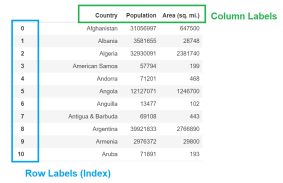

Flat Files
- Simple, easy-to-produce format
- Data stored as plain text (no formaing)
- One row per line
- Values for dierent elds are separated by a delimiter
- Most common at le type: comma-separated values
- One pandas function to load them all: read_csv()

Loading CSVs
- Sample of us_tax_data_2016.csv

In [ ]:
STATEFIPS,STATE,zipcode,agi
_
stub,...,N11901,A11901,N11902,A11902
1,AL,0,1,...,63420,51444,711580,1831661

In [ ]:
import pandas as pd
tax_data = pd.read_csv("us_tax_data_2016.csv")
tax_data.head(4)

In [ ]:
STATEFIPS STATE zipcode agi_stub ... N11901 A11901 N11902 A11902
0 1 AL 0 1 ... 63420 51444 711580 1831661
1 1 AL 0 2 ... 74090 110889 416090 1173463
2 1 AL 0 3 ... 64000 143060 195130 543284
3 1 AL 0 4 ... 45020 128920 117410 381329
[4 rows x 147 columns]

Loading Other Flat Files
- Specify a dierent delimiter with sep
- Sample of us
_
tax
_
data
_
2016.tsv

In [ ]:
STATEFIPS STATE zipcode agi
_
stub ... N11901 A11901 N11902 A11902
1 AL 0 1 ... 63420 51444 711580 1831661

In [ ]:
import pandas as pd
tax
_
data = pd.read
_
csv("us
_
tax
_
data
_
2016.tsv"
, sep="\t")
tax
_
data.head(3)
STATEFIPS STATE zipcode agi
_
stub ... N11901 A11901 N11902 A11902
0 1 AL 0 1 ... 63420 51444 711580 1831661
1 1 AL 0 2 ... 74090 110889 416090 1173463
2 1 AL 0 3 ... 64000 143060 195130 543284
[3 rows x 147 columns]

### Modigying flat file imports 

U.S. Tax Data

In [ ]:
tax
_
data = pd.read
_
csv('us
_
tax
_
data
_
2016.csv')
print(tax
_
data.shape)
(179796, 147)

Limiting Columns
Choose columns to load with the usecols keyword argument
Accepts a list of column numbers or names, or a function to lter column names

In [ ]:
col
_
names = ['STATEFIPS'
,
'STATE'
,
'zipcode'
,
'agi
_
stub'
,
'N1']
col
_
nums = [0, 1, 2, 3, 4]
# Choose columns to load by name
tax
_
data
_
v1 = pd.read
_
csv('us
_
tax
_
data
_
2016.csv'
,
usecols=col
_
names)
# Choose columns to load by number
tax
_
data
_
v2 = pd.read
_
csv('us
_
tax
_
data
_
2016.csv'
,
usecols=col
_
nums)
print(tax
_
data
_
v1.equals(tax
_
data
_
v2))
True

Limiting Rows
Limit the number of rows loaded with the nrows keyword argument

In [ ]:
tax
_
data
_
first1000 = pd.read
_
csv('us
_
tax
_
data
_
2016.csv'
, nrows=1000)
print(tax
_
data
_
first1000.shape)
(1000, 147)

Limiting Rows
Use nrows and skiprows together to process a le in chunks
skiprows accepts a list of row numbers, a number of rows, or a function to lter rows
Set header=None so pandas knows there are no column names

In [ ]:
tax_data_next500 = pd.read_csv('us_tax_data_2016.csv'
,
nrows=500,
skiprows=1000,
header=None)

In [ ]:
print(tax_data_next500.head(1))
0 1 2 3 4 5 6 7 8 9 10 ... 136 137 138 139 140 141 142 143
0 1 AL 35565 4 270 0 250 0 210 790 280 ... 1854 260 1978 0 0 0 0 50
[1 rows x 147 columns]

Assigning Column Names
Supply column names by passing a list to the names argument
The list MUST have a name for every column in your data
If you only need to rename a few columns, do it aer the import!

Assigning Column Names

In [ ]:
col_names = list(tax_data_first1000)
tax_data_next500 = pd.read_csv('us_tax_data_2016.csv'
,
nrows=500,
skiprows=1000,
header=None,
names=col_names)
print(tax_data_next500.head(1))
STATEFIPS STATE zipcode agi_stub ... N11901 A11901 N11902 A11902
0 1 AL 35565 4 ... 50 222 210 794
[1 rows x 147 columns]

### Handling errors and missing data 

Common Flat File Import Issues
Column data types are wrong
Values are missing
Records that cannot be read by pandas

Specifying Data Types
pandas automatically infers column data types

In [ ]:
pandas automatically infers column data types
print(tax
_
data.dtypes)
STATEFIPS int64
STATE object
zipcode int64
agi
_
stub int64
N1 int64
...
N11902 int64
A11902 int64
Length: 147, dtype: object

Specifying Data Types
Use the dtype keyword argument to specify column data types
dtype takes a dictionary of column names and data types

In [ ]:
tax_data = pd.read_csv("us_tax_data_2016.csv"
, dtype={"zipcode": str})
print(tax_data.dtypes)
STATEFIPS int64
STATE object
zipcode object
agi_stub int64
N1 int64
...
N11902 int64
A11902 int64
Length: 147, dtype: object

Customizing Missing Data Values
pandas automatically interprets some values as missing or NA

In [ ]:
print(tax
_
data.head())
STATEFIPS STATE zipcode agi
_
stub N1 ... A85300 N11901 A11901 N11902 A11902
0 1 AL 0 1 815440 ... 0 63420 51444 711580 1831661
1 1 AL 0 2 495830 ... 0 74090 110889 416090 1173463
2 1 AL 0 3 263390 ... 0 64000 143060 195130 543284
3 1 AL 0 4 167190 ... 0 45020 128920 117410 381329
4 1 AL 0 5 217440 ... 19 82940 423629 126130 506526
[5 rows x 147 columns]

Customizing Missing Data Values
Use the na_values keyword argument to set custom missing values
Can pass a single value, list, or dictionary of columns and values

In [ ]:
tax_data = pd.read_csv("us_tax_data_2016.csv"
,
na_values={"zipcode" : 0})
print(tax_data[tax_data.zipcode.isna()])
STATEFIPS STATE zipcode agi_stub N1 ... A85300 N11901 A11901 N11902 A11902
0 1 AL NaN 1 815440 ... 0 63420 51444 711580 1831661
1 1 AL NaN 2 495830 ... 0 74090 110889 416090 1173463
2 1 AL NaN 3 263390 ... 0 64000 143060 195130 543284
... ... ... ... ... ... ... ... ... ... ... ...
179034 56 WY NaN 5 38030 ... 121 13230 73326 22250 99589
179035 56 WY NaN 6 8480 ... 53835 3630 128149 2250 125557
[306 rows x 147 columns]

Lines with Errors
Sample of us
_
tax
_
data
_
2016
_
corrupt.csv

In [ ]:
STATEFIPS,STATE,zipcode,agi
_
stub,...,N11901,A11901,N11902,A11902
1,AL,0,1,...,63420,51444,711580,1831661
1,AL,0, ,2,...,74090,110889,416090,1173463
tax
_
data = pd.read
_
csv("us
_
tax
_
data
_
2016
_
corrupt.csv")

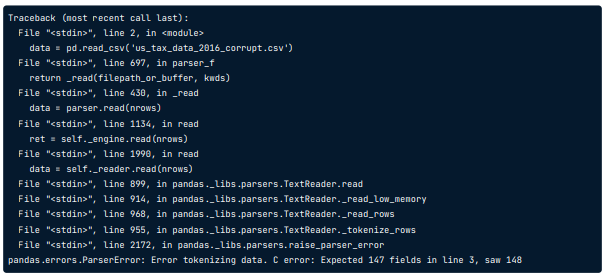

Lines with Errors
Set error_bad_lines=False to skip unparseable records
Set warn_bad_lines=True to see messages when records are skipped

In [ ]:
tax_data = pd.read_csv("us_tax_data_2016_corrupt.csv"
,
error_bad_lines=False,
warn_bad_lines=True)
b'Skipping line 3: expected 147 fields, saw 148\n'

## Importing Data From Excel Files 

### Introduction to spreadsheets 

Spreadsheets
Also known as Excel les
Data stored in tabular form, with cells arranged in rows and columns
Unlike at les, can have formaing and formulas
Multiple spreadsheets can exist in a workbook

Loading Spreadsheets
Spreadsheets have their own loading function in pandas : read
_
excel()
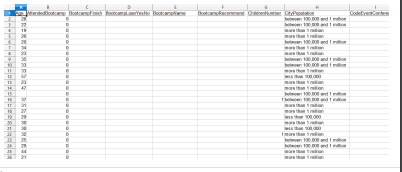

Loading Spreadsheets

In [ ]:
import pandas as pd
# Read the Excel file
survey_data = pd.read_excel("fcc_survey.xlsx")
# View the first 5 lines of data
print(survey_data.head())
Age AttendedBootcamp ... SchoolMajor StudentDebtOwe
0 28.0 0.0 ... NaN 20000
1 22.0 0.0 ... NaN NaN
2 19.0 0.0 ... NaN NaN
3 26.0 0.0 ... Cinematography And Film 7000
4 20.0 0.0 ... NaN NaN
[5 rows x 98 columns]

Loading Select Columns and Rows
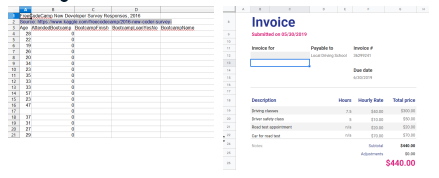

Loading Select Columns and Rows
read_excel() has many keyword arguments in common with read_csv()
nrows : limit number of rows to load
skiprows : specify number of rows or row numbers to skip
usecols : choose columns by name, positional number, or leer (e.g. "A:P")
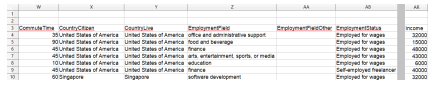

In [ ]:
Loading Select Columns and Rows
# Read columns W-AB and AR of file, skipping metadata header
survey_data = pd.read_excel("fcc_survey_with_headers.xlsx"
,
skiprows=2,
usecols="W:AB, AR")
# View data
print(survey_data.head())

CommuteTime CountryCitizen ... EmploymentFieldOther EmploymentStatus Income
0 35.0 United States of America ... NaN Employed for wages 32000.0
1 90.0 United States of America ... NaN Employed for wages 15000.0
2 45.0 United States of America ... NaN Employed for wages 48000.0
3 45.0 United States of America ... NaN Employed for wages 43000.0
4 10.0 United States of America ... NaN Employed for wages 6000.0
[5 rows x 7 columns]

### Getting data from multiple worksheets 

Selecting Sheets to Load
read
_
excel() loads the rst sheet in an Excel le by default
Use the sheet
_
name keyword argument to load other sheets
Specify spreadsheets by name and/or (zero-indexed) position number
Pass a list of names/numbers to load more than one sheet at a time
Any arguments passed to read
_
excel() apply to all sheets read

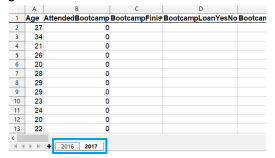

Loading Select Sheets

In [ ]:
# Get the second sheet by position index
survey_
data
_
sheet2 = pd.read
_
excel('fcc
_
survey.xlsx'
,
sheet
_
name=1)
# Get the second sheet by name
survey_
data
_
2017 = pd.read
_
excel('fcc
_
survey.xlsx'
,
sheet
_
name='2017')
print(survey_
data
_
sheet2.equals(survey_
data
_
2017))
True

Loading All Sheets
Passing sheet
_
name=None to read
_
excel() reads all sheets in a workbook

In [ ]:
survey_
responses = pd.read
_
excel("fcc
_
survey.xlsx"
, sheet
_
name=None)
print(type(survey_
responses))
<class 'collections.OrderedDict'>
for key, value in survey_
responses.items():
print(key, type(value))
2016 <class 'pandas.core.frame.DataFrame'>
2017 <class 'pandas.core.frame.DataFrame'>

Putting It All Together

In [ ]:
# Create empty data frame to hold all loaded sheets
all
_
responses = pd.DataFrame()
# Iterate through data frames in dictionary
for sheet
_
name, frame in survey_
responses.items():
# Add a column so we know which year data is from
frame["Year"] = sheet
_
name
# Add each data frame to all
_
responses
all
_
responses = all
_
responses.append(frame)
# View years in data
print(all
_
responses.Year.unique())
['2016' '2017']

### Modifying imports: true/false data 

Boolean Data
True / False data
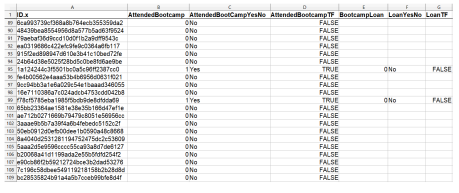

pandas and Booleans

In [ ]:
bootcamp_
data = pd.read
_
excel("fcc
_
survey_
booleans.xlsx")
print(bootcamp_
data.dtypes)

ID.x object
AttendedBootcamp float64
AttendedBootCampYesNo object
AttendedBootcampTF float64
BootcampLoan float64
LoanYesNo object
LoanTF float64
dtype: object

In [ ]:
# Count True values
print(bootcamp_
data.sum())
AttendedBootcamp 38
AttendedBootcampTF 38
BootcampLoan 14
LoanTF 14
dtype: object
        
# Count NAs
print(bootcamp_
data.isna().sum())
ID.x 0
AttendedBootcamp 0
AttendedBootCampYesNo 0
AttendedBootcampTF 0
BootcampLoan 964
LoanYesNo 964
LoanTF 964
dtype: int64

In [ ]:
# Load data, casting True/False columns as Boolean
bool
_
data = pd.read
_
excel("fcc
_
survey_
booleans.xlsx"
,
dtype={"AttendedBootcamp": bool,
"AttendedBootCampYesNo": bool,
"AttendedBootcampTF":bool,
"BootcampLoan": bool,
"LoanYesNo": bool,
"LoanTF": bool})
print(bool
_
data.dtypes)

ID.x object
AttendedBootcamp bool
AttendedBootCampYesNo bool
AttendedBootcampTF bool
BootcampLoan bool
LoanYesNo bool
LoanTF bool
dtype: object

pandas and Booleans
pandas loads True / False columns as oat data by default
Specify a column should be bool with read_excel() 's dtype argument
Boolean columns can only have True and False values
NA/missing values in Boolean columns are changed to True
pandas automatically recognizes some values as True / False in Boolean columns
Unrecognized values in a Boolean column are also changed to True

Setting Custom True/False Values
Use read
_
excel() 's true
_
values argument to set custom True values
Use false
_
values to set custom False values
Each takes a list of values to treat as True / False , respectively
Custom True / False values are only applied to columns set as Boolean

Setting Custom True/False Values

In [ ]:
# Load data with Boolean dtypes and custom T/F values
bool_data = pd.read_excel("fcc_survey_booleans.xlsx"
,
dtype={"AttendedBootcamp": bool,
"AttendedBootCampYesNo": bool,
"AttendedBootcampTF":bool,
"BootcampLoan": bool,
"LoanYesNo": bool,
"LoanTF": bool},
true_values=["Yes"],
false_values=["No"])

print(bool_data.sum())
AttendedBootcamp 38
AttendedBootCampYesNo 38
AttendedBootcampTF 38
BootcampLoan 978
LoanYesNo 978
LoanTF 978
dtype: object

Boolean Considerations
Are there missing values, or could there be in the future?
How will this column be used in analysis?
What would happen if a value were incorrectly coded as True ?
Could the data be modeled another way (e.g., as oats or integers)?

### Modifying imports: parsing dates 

Date and Time Data
Dates and times have their own data type and internal representation
Datetime values can be translated into string representations
Common set of codes to describe datetime string formaing

pandas and Datetimes
Datetime columns are loaded as objects (strings) by default
Specify that columns have datetimes with the parse
_
dates argument (not dtype !)
parse
_
dates can accept:
a list of column names or numbers to parse
a list containing lists of columns to combine and parse
a dictionary where keys are new column names and values are lists of columns to parse
together

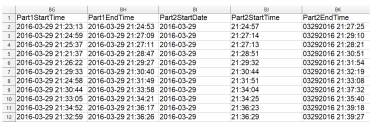

In [ ]:
Parsing Dates
# List columns of dates to parse
date
_
cols = ["Part1StartTime"
,
"Part1EndTime"]
# Load file, parsing standard datetime columns
survey_
df = pd.read
_
excel("fcc
_
survey.xlsx"
,
parse
_
dates=date
_
cols)

In [ ]:
# Check data types of timestamp columns
print(survey_df[["Part1StartTime"
,
"Part1EndTime"
,
"Part2StartDate"
,
"Part2StartTime"
,
"Part2EndTime"]].dtypes)
Part1StartTime datetime64[ns]
Part1EndTime datetime64[ns]
Part2StartDate object
Part2StartTime object
Part2EndTime object
dtype: object

In [ ]:
# List columns of dates to parse
date_cols = ["Part1StartTime"
,
"Part1EndTime"
,
[["Part2StartDate"
,
"Part2StartTime"]]]
# Load file, parsing standard and split datetime columns
survey_df = pd.read_excel("fcc_survey.xlsx"
,
parse_dates=date_cols)
print(survey_df.head(3))
Part2StartDate_Part2StartTime Age ... SchoolMajor StudentDebtOwe
0 2016-03-29 21:24:57 28.0 ... NaN 20000
1 2016-03-29 21:27:14 22.0 ... NaN NaN
2 2016-03-29 21:27:13 19.0 ... NaN NaN
[3 rows x 98 columns]

In [ ]:
# List columns of dates to parse
date_cols = {"Part1Start": "Part1StartTime"
,
"Part1End": "Part1EndTime"
,
"Part2Start": ["Part2StartDate"
,
"Part2StartTime"]}
# Load file, parsing standard and split datetime columns
survey_df = pd.read_excel("fcc_survey.xlsx"
,
parse_dates=date_cols)
print(survey_df.Part2Start.head(3))
0 2016-03-29 21:24:57
1 2016-03-29 21:27:14
2 2016-03-29 21:27:13
Name: Part2Start, dtype: datetime64[ns]

Non-Standard Dates
parse
_
dates doesn't work with non-standard datetime formats
Use pd.to
_
datetime() aer loading data if parse
_
dates won't work
to
_
datetime() arguments:
Data frame and column to convert
format : string representation of datetime format

Datetime Formatting
Describe datetime string formaing with codes and characters
Refer to strime.org for the full list

Datetime Formatting
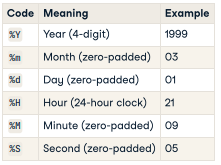

Parsing Non-Standard Dates
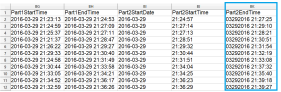

In [ ]:
format
_
string = "%m%d%Y %H:%M:%S"
survey_
df["Part2EndTime"] = pd.to
_
datetime(survey_
df["Part2EndTime"],
format=format
_
string)

print(survey_df.Part2EndTime.head())
0 2016-03-29 21:27:25
1 2016-03-29 21:29:10
2 2016-03-29 21:28:21
3 2016-03-29 21:30:51
4 2016-03-29 21:31:54
Name: Part2EndTime, dtype: datetime64[ns]

## Importing Data from Database 

### Introduction to databases 

Relational Databases
Data about entities is organized into tables
Each row or record is an instance of an entity
Each column has information about an aribute
Tables can be linked to each other via unique keys
Support more data, multiple simultaneous users, and data quality controls
Data types are specied for each column
SQL (Structured Query Language) to interact with databases

Common Relational Databases
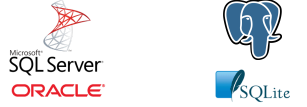
SQLite databases are computer les

Connecting to Databases
Two-step process:
1. Create way to connect to database
2. Query database

Creating a Database Engine
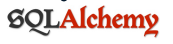
sqlalchemy
's create
_
engine() makes an engine to handle database connections
Needs string URL of database to connect to
SQLite URL format: sqlite:///filename.db

Querying Databases
pd.read
_
sql(query, engine) to load in data from a database
Arguments
query : String containing SQL query to run or table to load
engine : Connection/database engine object

SQL Review: SELECT
Used to query data from a database
Basic syntax:
SELECT [column
_
names] FROM [table
_
name];
To get all data in a table:
SELECT * FROM [table
_
name];
Code style: keywords in ALL CAPS, semicolon (;) to end a statement

Getting Data from a Database

In [ ]:
# Load pandas and sqlalchemy's create
_
engine
import pandas as pd
from sqlalchemy import create
_
engine
# Create database engine to manage connections
engine = create
_
engine("sqlite:///data.db")
# Load entire weather table by table name
weather = pd.read
_
sql("weather"
, engine)

In [ ]:
# Create database engine to manage connections
engine = create_engine("sqlite:///data.db")
# Load entire weather table with SQL
weather = pd.read_sql("SELECT * FROM weather"
, engine)
print(weather.head())
station name latitude ... prcp snow tavg tmax tmin
0 USW00094728 NY CITY CENTRAL PARK, NY US 40.77898 ... 0.00 0.0 52 42
1 USW00094728 NY CITY CENTRAL PARK, NY US 40.77898 ... 0.00 0.0 48 39
2 USW00094728 NY CITY CENTRAL PARK, NY US 40.77898 ... 0.00 0.0 48 42
3 USW00094728 NY CITY CENTRAL PARK, NY US 40.77898 ... 0.00 0.0 51 40
4 USW00094728 NY CITY CENTRAL PARK, NY US 40.77898 ... 0.75 0.0 61 50
[5 rows x 13 columns]

### Refining imports with SQL queries 

SELECTing Columns
SELECT [column names] FROM [table name];
Example:

In [ ]:
SELECT date, tavg
FROM weather;

WHERE Clauses
Use a WHERE clause to selectively import records

In [ ]:
SELECT [column
_
names]
FROM [table
_
name]
WHERE [condition];

## Filtering by Numbers

- Compare numbers with mathematical operators
    - =
> and >=
< and <=
<> (not equal to)
Example:

In [ ]:
SELECT *
FROM weather
WHERE tmax > 32;

Filtering Text
Match exact strings with the = sign and the text to match
String matching is case-sensitive
Example:

In [ ]:
/* Get records about incidents in Brooklyn */
SELECT *
FROM hpd311calls
WHERE borough = 'BROOKLYN';

SQL and pandas

In [ ]:
# Load libraries
import pandas as pd
from sqlalchemy import create
_
engine
# Create database engine
engine = create
_
engine("sqlite:///data.db")
# Write query to get records from Brooklyn
query = """SELECT *
FROM hpd311calls
WHERE borough = 'BROOKLYN';"""
# Query the database
brooklyn
_
calls = pd.read
_
sql(query, engine)
print(brookyn
_
calls.borough.unique())
['BROOKLYN']

Combining Conditions: AND
WHERE clauses with AND return records that meet all conditions

In [ ]:
# Write query to get records about plumbing in the Bronx
and
_query = """SELECT *
FROM hpd311calls
WHERE borough = 'BRONX'
AND complaint
_
type = 'PLUMBING';"""
# Get calls about plumbing issues in the Bronx
bx
_plumbing_
calls = pd.read
_
sql(and
_query, engine)
# Check record count
print(bx
_plumbing_
calls.shape)
(2016, 8)

In [ ]:
Combining Conditions: OR

In [ ]:
WHERE clauses with OR return records that meet at least one condition
# Write query to get records about water leaks or plumbing
or
_query = """SELECT *
FROM hpd311calls
WHERE complaint
_
type = 'WATER LEAK'
OR complaint
_
type = 'PLUMBING';"""
# Get calls that are about plumbing or water leaks
leaks
_
or
_plumbing = pd.read
_
sql(or
_query, engine)
# Check record count
print(leaks
_
or
_plumbing.shape)
(10684, 8)

### More complex SQL queries

Getting DISTINCT Values
Get unique values for one or more columns with SELECT DISTINCT
Syntax:
SELECT DISTINCT [column names] FROM [table];
Remove duplicate records:
SELECT DISTINCT * FROM [table];


In [ ]:
/* Get unique street addresses and boroughs */
SELECT DISTINCT incident
_
address,
borough
FROM hpd311calls;

Aggregate Functions
Query a database directly for descriptive statistics
Aggregate functions
SUM
AVG
MAX
MIN
COUNT

Aggregate Functions
SUM , AVG , MAX , MIN
Each takes a single column name
SELECT AVG(tmax) FROM weather;
COUNT
Get number of rows that meet query conditions
SELECT COUNT(*) FROM [table_name];
Get number of unique values in a column
SELECT COUNT(DISTINCT [column_names]) FROM [table_name];

GROUP BY
Aggregate functions calculate a single summary statistic by default
Summarize data by categories with GROUP BY statements
Remember to also select the column you're grouping by!

In [ ]:
/* Get counts of plumbing calls by borough */
SELECT borough,
COUNT(*)
FROM hpd311calls
WHERE complaint
_
type = 'PLUMBING'
GROUP BY borough;

Counting by Groups

In [ ]:
# Create database engine
engine = create
_
engine("sqlite:///data.db")
# Write query to get plumbing call counts by borough
query = """SELECT borough, COUNT(*)
FROM hpd311calls
WHERE complaint
_
type = 'PLUMBING'
GROUP BY borough;"""
# Query databse and create data frame
plumbing_
call
_
counts = pd.read
_
sql(query, engine)

In [ ]:
print(plumbing_call_counts)
borough COUNT(*)
0 BRONX 2016
1 BROOKLYN 2702
2 MANHATTAN 1413
3 QUEENS 808
4 STATEN ISLAND 178

### Loading multiple tables with joins 

Keys
- Database records have unique identiers, or keys

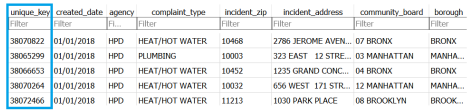
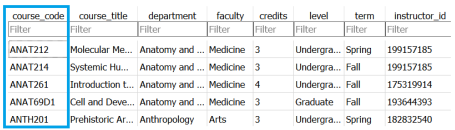
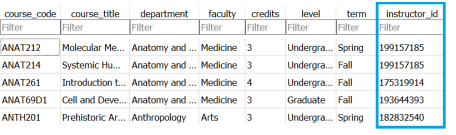
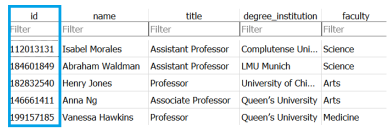
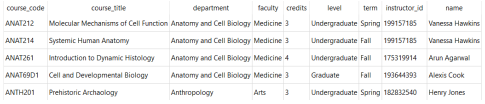
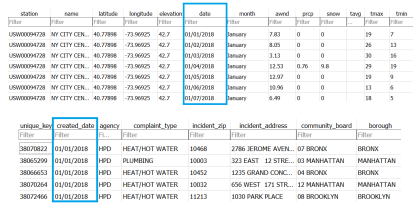

Joining Tables

In [ ]:
SELECT *
FROM hpd311calls

In [ ]:
SELECT *
FROM hpd311calls
JOIN weather
ON hpd311calls.created_date = weather.date;


Use dot notation ( table.column ) when working with multiple tables
Default join only returns records whose key values appear in both tables
Make sure join keys are the same data type or nothing will match

Joining and Filtering

In [ ]:
/* Get only heat/hot water calls and join in weather data */
SELECT *
FROM hpd311calls
JOIN weather
ON hpd311calls.created
_
date = weather.date
WHERE hpd311calls.complaint
_
type = 'HEAT/HOT WATER';

Joining and Aggregating

In [ ]:
/* Get call counts by borough */
SELECT hpd311calls.borough,
COUNT(*)
FROM hpd311calls
GROUP BY hpd311calls.borough;

In [ ]:
/* Get call counts by borough
and join in population and housing counts */
SELECT hpd311calls.borough,
COUNT(*),
boro_census.total_population,
boro_census.housing_units
FROM hpd311calls
GROUP BY hpd311calls.borough

In [ ]:
LECT hpd311calls.borough,
COUNT(*),
boro_census.total_population,
boro_census.housing_units
FROM hpd311calls
JOIN boro_census
ON hpd311calls.borough = boro_census.borough
GROUP BY hpd311calls.borough;

In [ ]:
query = """SELECT hpd311calls.borough,
COUNT(*),
boro
_
census.total
_population,
boro
_
census.housing_
units
FROM hpd311calls
JOIN boro
_
census
ON hpd311calls.borough = boro
_
census.borough
GROUP BY hpd311calls.borough;"""
call
_
counts = pd.read
_
sql(query, engine)
print(call
_
counts)


borough COUNT(*) total
_population housing_
units
0 BRONX 29874 1455846 524488
1 BROOKLYN 31722 2635121 1028383
2 MANHATTAN 20196 1653877 872645
3 QUEENS 11384 2339280 850422
4 STATEN ISLAND 1322 475948 179179

Review
SQL order of keywords
SELECT
FROM
JOIN
WHERE
GROUP BY

## Importing JSON Data and Working with APIs 

### Introduction to JSON 

Javascript Object Notation (JSON)
Common web data format
Not tabular
Records don't have to all have the same set of aributes
Data organized into collections of objects
Objects are collections of aribute-value pairs
Nested JSON: objects within objects

Reading JSON Data
read
_json()
Takes a string path to JSON
_or
_ JSON data as a string
Specify data types with dtype keyword argument
orient keyword argument to ag uncommon JSON data layouts
possible values in pandas documentation

Data Orientation
JSON data isn't tabular
pandas guesses how to arrange it in a table
pandas can automatically handle common orientations

Record Orientation
Most common JSON arrangement

In [ ]:
[
{
"age
_
adjusted
_
death
_
rate": "7.6"
,
"death
_
rate": "6.2"
,
"deaths": "32"
,
"leading_
cause": "Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)"
,
"race
_
ethnicity": "Asian and Pacific Islander"
,
"sex": "F"
,
"year": "2007"
},
{
"age
_
adjusted
_
death
_
rate": "8.1"
,
"death
_
rate": "8.3"
,
"deaths": "87"
,
...

Column Orientation
More space-ecient than record-oriented JSON

In [ ]:
{
"age
_
adjusted
_
death
_
rate": {
"0": "7.6"
,
"1": "8.1"
,
"2": "7.1"
,
"3": "
.
"
,
"4": "
.
"
,
"5": "7.3"
,
"6": "13"
,
"7": "20.6"
,
"8": "17.4"
,
"9": "
.
"
,
"10": "
.
"
,
"11": "19.8"
,
...

Specifying Orientation
Split oriented data - nyc
_
death
_
causes.json
{
"columns": [
"age
_
adjusted
_
death
_
rate"
,
"death
_
rate"
,
"deaths"
,
"leading_
cause"
,
"race
_
ethnicity"
,
"sex"
,
"year"
],
"index": [...],
"data": [
[
"7.6"
,

In [ ]:
import pandas as pd
death
_
causes = pd.read
_json("nyc
_
death
_
causes.json"
,
orient="split")
print(death
_
causes.head())

age
_
adjusted
_
death
_
rate death
_
rate deaths leading_
cause race
_
ethnicity sex year
0 7.6 6.2 32 Accidents Except Drug... Asian and Pacific Islander F 2007
1 8.1 8.3 87 Accidents Except Drug... Black Non-Hispanic F 2007
2 7.1 6.1 71 Accidents Except Drug... Hispanic F 2007
3 . . . Accidents Except Drug... Not Stated/Unknown F 2007
4 . . . Accidents Except Drug... Other Race/ Ethnicity F 2007
[5 rows x 7 columns]

### Introduction to APIs 

Application Programming Interfaces
Denes how a application communicates with other programs
Way to get data from an application without knowing database details
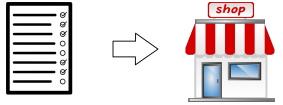
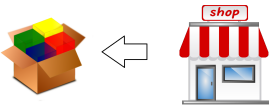

Requests
Send and get data from websites
Not tied to a particular API
requests.get() to get data from a URL

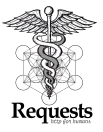

requests.get()
requests.get(url
_
string) to get data from a URL
Keyword arguments
params keyword: takes a dictionary of parameters and values to customize API request
headers keyword: takes a dictionary, can be used to provide user authentication to API
Result: a response object, containing data and metadata
response.json() will return just the JSON data

response.json() and pandas
response.json() returns a dictionary
read
_json() expects strings, not dictionaries
Load the response JSON to a data frame with pd.DataFrame()
read
_json() will give an error!

Yelp Business Search API
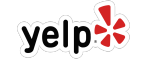
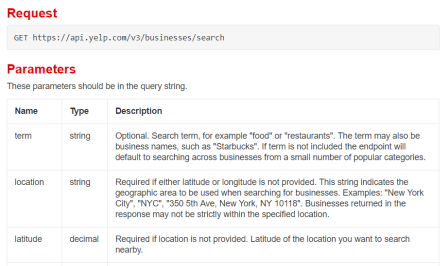



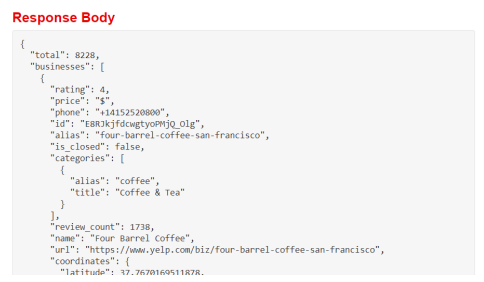

Making Requests

In [ ]:
import requests
import pandas as pd
api
_
url = "https://api.yelp.com/v3/businesses/search"
# Set up parameter dictionary according to documentation
params = {"term": "bookstore"
,
"location": "San Francisco"}
# Set up header dictionary w/ API key according to documentation
headers = {"Authorization": "Bearer {}"
.format(api
_
key)}
# Call the API
response = requests.get(api
_
url,
params=params,
headers=headers)

Parsing Responses

In [ ]:
# Isolate the JSON data from the response object
data = response.json()
print(data)
# Load businesses data to a data frame
bookstores = pd.DataFrame(data["businesses"])
print(bookstores.head(2))
alias ... url
0 city-lights-bookstore-san-francisco ... https://www.yelp.com/biz/city-lights-bookstore...
1 alexander-book-company-san-francisco ... https://www.yelp.com/biz/alexander-book-compan...
[2 rows x 16 columns]


### Working with nested JSONs 

Nested JSONs
JSONs contain objects with aribute-value pairs
A JSON is nested when the value itself is an object

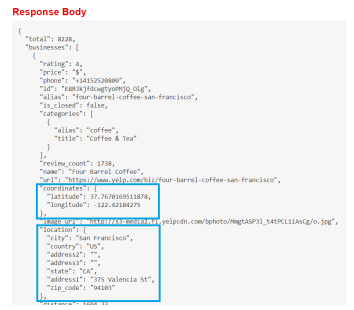
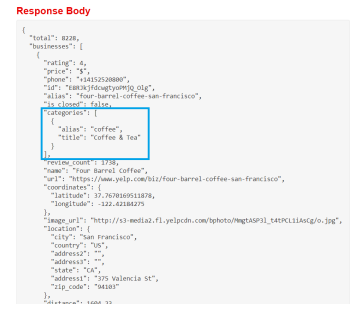
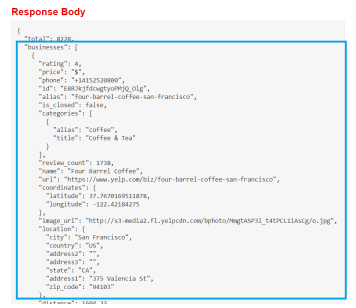

In [ ]:
# Print columns containing nested data
print(bookstores[["categories"
,
"coordinates"
,
"location"]].head(3))
categories \
0 [{'alias': 'bookstores'
,
'title': 'Bookstores'}]
1 [{'alias': 'bookstores'
,
'title': 'Bookstores'...
2 [{'alias': 'bookstores'
,
'title': 'Bookstores'}]
coordinates \
0 {'latitude': 37.7975997924805,
'longitude': -1...
1 {'latitude': 37.7885846793652,
'longitude': -1...
2 {'latitude': 37.7589836120605,
'longitude': -1...
location
0 {'address1': '261 Columbus Ave'
,
'address2': '...
1 {'address1': '50 2nd St'
,
'address2': ''
,
'add...
2 {'address1': '866 Valencia St'
,
'address2': ''...

pandas.io.json
pandas.io.json submodule has tools for reading and writing JSON
Needs its own import statement
json
_
normalize()
Takes a dictionary/list of dictionaries (like pd.DataFrame() does)
Returns a aened data frame
Default aened column name paern: attribute.nestedattribute
Choose a dierent separator with the sep argument

Loading Nested JSON Data

In [ ]:
import pandas as pd
import requests
from pandas.io.json import json
_
normalize
# Set up headers, parameters, and API endpoint
api
_
url = "https://api.yelp.com/v3/businesses/search"
headers = {"Authorization": "Bearer {}"
.format(api
_
key)}
params = {"term": "bookstore"
,
"location": "San Francisco"}
# Make the API call and extract the JSON data
response = requests.get(api
_
url,
headers=headers,
params=params)
data = response.json()

In [ ]:
# Flatten data and load to data frame, with _ separators
bookstores = json_normalize(data["businesses"], sep="_")
print(list(bookstores))
['alias'
,
'categories'
,
'coordinates_latitude'
,
'coordinates_longitude'
,
...
'location_address1'
,
'location_address2'
,
'location_address3'
,
'location_city'
,
'location_country'
,
'location_display_address'
,
'location_state'
,
'location_zip_code'
,
...
'url']

Deeply Nested Data

In [ ]:
print(bookstores.categories.head())
0 [{'alias': 'bookstores'
,
'title': 'Bookstores'}]
1 [{'alias': 'bookstores'
,
'title': 'Bookstores'
...
2 [{'alias': 'bookstores'
,
'title': 'Bookstores'}]
3 [{'alias': 'bookstores'
,
'title': 'Bookstores'}]
4 [{'alias': 'bookstores'
,
'title': 'Bookstores'
...
Name: categories, dtype: object

Deeply Nested Data
json_normalize()
record_path : string/list of string aributes to nested data
meta : list of other aributes to load to data frame
meta_prefix : string to prex to meta column names

In [ ]:
# Flatten categories data, bring in business details
df = json_normalize(data["businesses"],
sep="_"
,
record_path="categories"
,
meta=["name"
,
"alias"
,
"rating"
,
["coordinates"
,
"latitude"],
["coordinates"
,
"longitude"]],
meta_prefix="biz_")

In [ ]:
print(df.head(4))

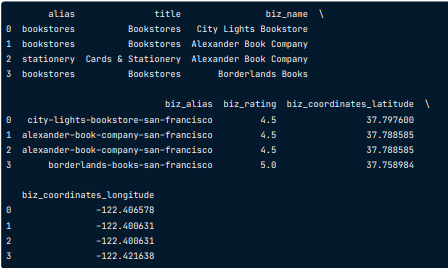

### Combining multiple datasets 

Appending
Use case: adding rows from one data frame to another
append()
Data frame method
Syntax: df1.append(df2)
Set ignore
_
index to True to renumber rows

In [ ]:
# Get first 20 bookstore results
params = {"term": "bookstore"
,
"location": "San Francisco"}
first_results = requests.get(api_url,
headers=headers
params=params).json()
first_20_bookstores = json_normalize(first_results["businesses"],
sep="_")
print(first_20_bookstores.shape)
(20, 24)

In [ ]:
# Get the next 20 bookstores
params["offset"] = 20
next_results = requests.get(api_url,
headers=headers
params=params).json()
next_20_bookstores = json_normalize(next_results["businesses"],
sep="_")
print(next_20_bookstores.shape)
(20, 24)

In [ ]:
# Put bookstore datasets together, renumber rows
bookstores = first
_
20
_
bookstores.append(next
_
20
_
bookstores,
ignore
_
index=True)
print(bookstores.name)
0 City Lights Bookstore
1 Alexander Book Company
2 Borderlands Books
3 Alley Cat Books
4 Dog Eared Books
... ...
35 Forest Books
36 San Francisco Center For The Book
37 KingSpoke - Book Store
38 Eastwind Books & Arts
39 My Favorite
Name: name, dtype: object

Merging
Use case: combining datasets to add related columns
Datasets have key column(s) with common values
merge() : pandas version of a SQL join

Merging
merge()
Both a pandas function and a data frame method
df.merge() arguments
Second data frame to merge
Columns to merge on
on if names are the same in both data frames
left_on and right_on if key names dier
Key columns should be the same data type

In [ ]:
call
_
counts.head()
created
_
date call
_
counts
0 01/01/2018 4597
1 01/02/2018 4362
2 01/03/2018 3045
3 01/04/2018 3374
4 01/05/2018 4333
weather.head()
date tmax tmin
0 12/01/2017 52 42
1 12/02/2017 48 39
2 12/03/2017 48 42
3 12/04/2017 51 40
4 12/05/2017 61 50

In [ ]:
# Merge weather into call counts on date columns
merged = call_counts.merge(weather,
left_on="created_date"
,
right_on="date")
print(merged.head())
created_date call_counts date tmax tmin
0 01/01/2018 4597 01/01/2018 19 7
1 01/02/2018 4362 01/02/2018 26 13
2 01/03/2018 3045 01/03/2018 30 16
3 01/04/2018 3374 01/04/2018 29 19
4 01/05/2018 4333 01/05/2018 19 9

Default merge() behavior: return only values that are in both datasets
One record for each value match between data frames
Multiple matches = multiple records

### Wrap-up 

Recap
Chapters 1 and 2
read
_
csv() and read
_
excel()
Seing data types, choosing data to load,
handling missing data and errors

Recap
Chapter 3
read_sql() and sqlalchemy
SQL SELECT , WHERE , aggregate functions
and joins

Recap
Chapter 4
read
_json() , json
_
normalize() , and
requests
Working with APIs and nested JSONs
Appending and merging datasets

Where to next?
Learn more about data wrangling in pandas
Working with indexes, transforming values, dropping rows and columns
Reshaping data by merging, melting, pivoting
Data Manipulation with Python Skill Track

Where to next?
Explore a variety of analysis topics
Descriptive statistics (e.g. medians, means, standard deviation)
Inferential statistics (hypothesis testing, correlation, regression)
Exploratory Data Analysis in Python
Introduction to Linear Modeling in Python

Where to next?
Learn data visualization techniques
seaborn and matplotlib libraries
Introduction to Data Visualization in Python
Introduction to Data Visualization with Matplotlib